### 먼저 필요한 패키지를 가져옵니다.

In [2]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

In [3]:
abalone_columns= list()
for l in open('data/abalone_attributes.txt'):
    abalone_columns.append(l.strip())

abalone_columns

data = pd.read_csv('data/abalone.txt', header=None, names=abalone_columns)

In [4]:
label = data['Sex']  # 성별만 라벨링

In [5]:
data.head()   #앞(위) 5줄만 보기

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [6]:
data.shape  # 전체 개수는 4177 데이터 , 컬럼은 9개

(4177, 9)

In [7]:
del data['Sex'] #성별 컬럼은 삭제

In [8]:
data.head()  #성별 삭제된 것 확인

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [9]:
data.describe()   #데이터의 각 변수별 개수, 평균, 표준편차, 최대, 최소 등을 간단한 설명

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          4177 non-null   float64
 1   Diameter        4177 non-null   float64
 2   Height          4177 non-null   float64
 3   Whole weight    4177 non-null   float64
 4   Shucked weight  4177 non-null   float64
 5   Viscera weight  4177 non-null   float64
 6   Shell weight    4177 non-null   float64
 7   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 261.2 KB


## Min-Max 스케일링

In [11]:
data = (data - np.min(data)) / (np.max(data) - np.min(data))    # Min-Max 스케일링

In [12]:
data.head()   # 스케일링된 후 0~1사이로 표현됨

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.513514,0.521008,0.084071,0.181335,0.150303,0.132324,0.147982,0.500000
1,0.371622,0.352941,0.079646,0.079157,0.066241,0.063199,0.068261,0.214286
2,0.614865,0.613445,0.119469,0.239065,0.171822,0.185648,0.207773,0.285714
3,0.493243,0.521008,0.110619,0.182044,0.144250,0.149440,0.152965,0.321429
4,0.344595,0.336134,0.070796,0.071897,0.059516,0.051350,0.053313,0.214286


In [13]:
from sklearn.preprocessing import MinMaxScaler 

In [14]:
mMscaler = MinMaxScaler()

In [15]:
# mMscaler.fit(data)  #data를 적용시킬 때 fit

In [16]:
mMscaled_data = mMscaler.fit_transform(data) # 전환하고 동작시키는 transform과  처음fit을 합침

In [17]:
type(mMscaled_data)   # 넘파이 배열로..

numpy.ndarray

In [18]:
type(data)  #  위에 한 것은 판다스 배열..

pandas.core.frame.DataFrame

## Standard Scaling

In [19]:
from sklearn.preprocessing import StandardScaler
sdscaler = StandardScaler()

In [20]:
sdscaled_data =  sdscaler.fit_transform(data)

In [21]:
sdscaled_data

array([[-0.57455813, -0.43214879, -1.06442415, ..., -0.72621157,
        -0.63821689,  1.57154357],
       [-1.44898585, -1.439929  , -1.18397831, ..., -1.20522124,
        -1.21298732, -0.91001299],
       [ 0.05003309,  0.12213032, -0.10799087, ..., -0.35668983,
        -0.20713907, -0.28962385],
       ...,
       [ 0.6329849 ,  0.67640943,  1.56576738, ...,  0.97541324,
         0.49695471, -0.28962385],
       [ 0.84118198,  0.77718745,  0.25067161, ...,  0.73362741,
         0.41073914,  0.02057072],
       [ 1.54905203,  1.48263359,  1.32665906, ...,  1.78744868,
         1.84048058,  0.64095986]])

In [22]:
!pip install imblearn    

In [23]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [24]:
ros = RandomOverSampler()
rus = RandomUnderSampler()

In [27]:
data.shape

(4177, 8)

In [32]:
oversampled_data, oversampled_label = ros.fit_resample(data, label)
oversampled_data = pd.DataFrame(oversampled_data, columns=data.columns)

In [33]:
oversampled_data.shape

(4584, 8)

In [34]:
oversampled_data

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.513514,0.521008,0.084071,0.181335,0.150303,0.132324,0.147982,0.500000
1,0.371622,0.352941,0.079646,0.079157,0.066241,0.063199,0.068261,0.214286
2,0.614865,0.613445,0.119469,0.239065,0.171822,0.185648,0.207773,0.285714
3,0.493243,0.521008,0.110619,0.182044,0.144250,0.149440,0.152965,0.321429
4,0.344595,0.336134,0.070796,0.071897,0.059516,0.051350,0.053313,0.214286
...,...,...,...,...,...,...,...,...
4579,0.486486,0.411765,0.106195,0.210554,0.173504,0.182357,0.162431,0.250000
4580,0.547297,0.470588,0.110619,0.184877,0.164761,0.143515,0.143000,0.214286
4581,0.493243,0.478992,0.106195,0.176200,0.198722,0.123766,0.116592,0.178571
4582,0.418919,0.420168,0.084071,0.088543,0.060861,0.071758,0.088191,0.464286


In [35]:
undersampled_data, undersampled_label = rus.fit_resample(data, label)

In [37]:
undersampled_data.shape

(3921, 8)

In [53]:
from sklearn.datasets import make_classification
data, label = make_classification(
    n_samples=1000,
    n_classes=3,
    n_features=2,
    n_repeated=0,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    weights=[0.05, 0.15, 0.8],
    class_sep=1, 
    random_state=2022
)

In [54]:
data.shape

(1000, 2)

In [55]:
data

array([[-2.11117507,  0.70864868],
       [ 0.03908554, -2.1966176 ],
       [ 0.61063734, -1.29651695],
       ...,
       [-0.94729639, -1.26505046],
       [ 0.98391513, -1.8661851 ],
       [ 0.15128065,  2.68764856]])

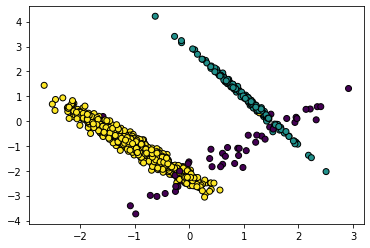

In [56]:
plt.scatter(data[:,0],data[:,1], c=label,linewidth=1, edgecolor='black')

In [57]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(k_neighbors=5)

In [58]:
smoted_data, smoted_label = smote.fit_resample(data, label)

In [59]:
data.shape

(1000, 2)

In [60]:
smoted_data.shape

(2382, 2)

In [61]:
print('원본 데이터의 클래스 비율 \n{}'.format(pd.get_dummies(label).sum()))
print('\nSMOTE 결과 \n{}'.format(pd.get_dummies(smoted_label).sum()))

원본 데이터의 클래스 비율 
0     54
1    152
2    794
dtype: int64

SMOTE 결과 
0    794
1    794
2    794
dtype: int64


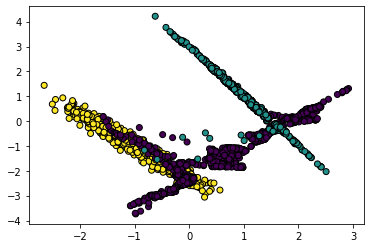

In [65]:
plt.scatter(smoted_data[:,0],smoted_data[:,1],
           c=smoted_label, linewidth=1, edgecolor='black')
                        

## Dimensionality Reduction 차원의 축소

In [66]:
from sklearn.datasets import load_digits

In [67]:
digits = load_digits()

In [69]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [71]:
digits.data.shape

(1797, 64)

In [72]:
data = digits.data
label = digits.target

Label : 0


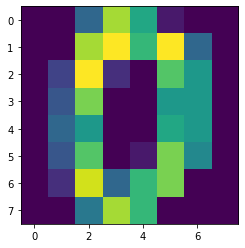

In [78]:
plt.imshow(data[0].reshape(8,8))
print('Label : {}'.format(label[0]))

## PCA (Principal Component Analysis) 주성분 분석

In [81]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [83]:
new_data = pca.fit_transform(data)

In [84]:
data.shape

(1797, 64)

In [85]:
new_data.shape   #차원을 축소

(1797, 2)

In [86]:
new_data[0]

array([-1.25946473, 21.27488374])

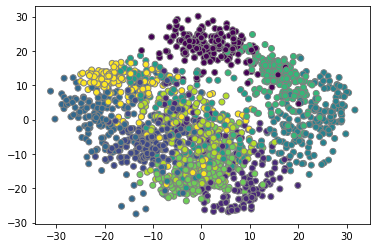

In [92]:
plt.scatter(new_data[:,0], new_data[:,1], c=label,
           linewidth=1, edgecolor='gray')

## Label Encoding

In [94]:
data = pd.read_csv('data/abalone.txt', header=None, 
                  names=abalone_columns)

In [95]:
label = data['Sex']

In [96]:
label.head()

0    M
1    M
2    F
3    M
4    I
Name: Sex, dtype: object

In [97]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()

In [103]:
label_encoded_label = le.fit_transform(label)
label_encoded_label.reshape(-1,1)

array([[2],
       [2],
       [0],
       ...,
       [2],
       [0],
       [2]])

In [100]:
result = pd.DataFrame(data = np.concatenate([label.values.reshape((-1,1)), 
                             label_encoded_label.reshape((-1, 1))], axis=1),
                             columns=['label', 'label_encoded']) 

In [101]:
result

,label,label_encoded
0,M,2
1,M,2
2,F,0
3,M,2
4,I,1
...,...,...
4172,F,0
4173,M,2
4174,M,2
4175,F,0


## One-hot Encoding

In [105]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)

In [106]:
one_hot_encoded = ohe.fit_transform(label.values.reshape(-1,1))

In [108]:
print(one_hot_encoded)

[[0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


 ## K-Means clustering

In [109]:
from sklearn.datasets import load_wine
wine =load_wine()

In [110]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [112]:
data = wine.data
label = wine.target
columns = wine.feature_names

In [113]:
data = pd.DataFrame(data, columns = columns)
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [114]:
data.shape

(178, 13)

In [115]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

In [116]:
data

array([[0.84210526, 0.1916996 , 0.57219251, ..., 0.45528455, 0.97069597,
        0.56134094],
       [0.57105263, 0.2055336 , 0.4171123 , ..., 0.46341463, 0.78021978,
        0.55064194],
       [0.56052632, 0.3201581 , 0.70053476, ..., 0.44715447, 0.6959707 ,
        0.64693295],
       ...,
       [0.58947368, 0.69960474, 0.48128342, ..., 0.08943089, 0.10622711,
        0.39728959],
       [0.56315789, 0.36561265, 0.54010695, ..., 0.09756098, 0.12820513,
        0.40085592],
       [0.81578947, 0.66403162, 0.73796791, ..., 0.10569106, 0.12087912,
        0.20114123]])

In [117]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)   #2차원으로 축소 PCA
data = pca.fit_transform(data)

In [118]:
data.shape

(178, 2)

In [126]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)

In [127]:
kmeans.fit(data)

KMeans(n_clusters=3)

In [128]:
cluster = kmeans.predict(data)

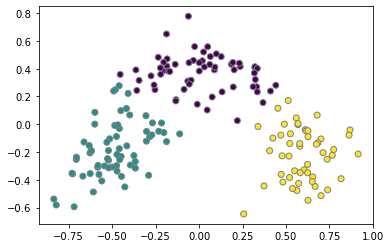

In [132]:
plt.scatter(data[:,0],data[:,1], c=cluster,
           linewidth=1, edgecolor='gray')

## Hierarchical clustering